# 언제 지하철을 가장 많이 이용할까?

In [1]:
import pandas as pd

## 1. 준비한 자료 읽어오기

In [5]:
#앞서 정리한 파일 불러오기
fpath = '/Users/jungwon/Documents/학교/포트폴리오/data/subway_raw.xlsx'

raw = pd.read_excel(fpath)
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,금,중앙선,1220,지평,38,49,20190304
1,20190301,금,중앙선,1219,용문,2804,3073,20190304
2,20190301,금,중앙선,1218,원덕,439,479,20190304
3,20190301,금,중앙선,1217,양평,2984,3291,20190304
4,20190301,금,중앙선,1216,오빈,311,338,20190304


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## 가장 승객이 많은 날짜?

In [9]:
#pivot_table을 이용하여 사용일자/요일별 승차승객수 합계 데이터를 정리
#index = ['사용일자', '요일'], values='승차총승객수'

data_date = raw.pivot_table(index = ['사용일자', '요일'], values = '승차총승객수', aggfunc = 'sum')
data_date

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294
...,...,...
20190626,수,8295254
20190627,목,8197084
20190628,금,8599857


In [11]:
#sort_values()를 이용하여 승객수 기준으로 정렬
data_date.sort_values(by = '승차총승객수', ascending=False)

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


### 5월에 지하철 승객수가 많다?

### 금요일에 지하철 승객수가 많다?

#### 월별 승객수 비교 -> 필요한 컬럼 추가하기(연월)

In [12]:
raw.tail()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190630,일,2호선,204,을지로4가,4940,4668,20190703
99338,20190630,일,2호선,203,을지로3가,12043,11854,20190703
99339,20190630,일,2호선,202,을지로입구,31622,29723,20190703
99340,20190630,일,2호선,201,시청,10178,8214,20190703
99341,20190630,일,1호선,159,동묘앞,13859,14352,20190703


In [18]:
#연월일 데이터에서 연월/월일 데이터 정리

yearmonth_list = []
monthday_list = []
for date in raw['사용일자']:
    yearmonth = str(date)[:6]
    yearmonth_list.append(yearmonth)
    monthday = str(date)[4:]
    monthday_list.append(monthday)


In [20]:
#연월/월일 컬럼 추가하기

raw['연월'] = yearmonth_list
raw['월일'] = monthday_list

raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190301,금,중앙선,1220,지평,38,49,20190304,201903,0301
1,20190301,금,중앙선,1219,용문,2804,3073,20190304,201903,0301
2,20190301,금,중앙선,1218,원덕,439,479,20190304,201903,0301
3,20190301,금,중앙선,1217,양평,2984,3291,20190304,201903,0301
4,20190301,금,중앙선,1216,오빈,311,338,20190304,201903,0301


In [26]:
#월별 승객수 정리
#raw.pivot_table(index = , values = , aggfunc = )

#pd.pivot_table(data = raw, index = , values = , aggfunc = )

#pd.pivot_table(raw, index = , values = , aggfunc = )

data_month = raw.pivot_table(index = '연월', values = '승차총승객수', aggfunc = 'sum').sort_values(by = '승차총승객수', ascending = False)
data_month

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


#### 일별 승객수 비교

In [30]:
#요일별 승객수 정리
data_week = pd.pivot_table(raw, index = '요일', values='승차총승객수', aggfunc='sum')
data_week = data_week.sort_values(by = '승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


#### 월별로 편차가 존재할까? --> 월별/일자별 승객수 그래프로 살펴보기

In [33]:
#먼저 1개월 데이터 선택

year_month = '201901'
cond = raw['연월'] == yearmonth
df_selected = raw[cond]

df_selected.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
81618,20190601,토,우이신설선,4706,삼양,1785,1897,20190604,201906,0601
81619,20190601,토,우이신설선,4705,화계,2942,2606,20190604,201906,0601
81620,20190601,토,우이신설선,4704,가오리,3623,3408,20190604,201906,0601
81621,20190601,토,우이신설선,4703,4.19민주묘지,2738,2414,20190604,201906,0601
81622,20190601,토,우이신설선,4702,솔밭공원,2178,2172,20190604,201906,0601


In [37]:
#1개월 데이터에서 일자/요일별 승객수 계 데이터를 정리
df_pivot = df_selected.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

,월일,요일,승차총승객수
0,0601,토,6847512
1,0602,일,4940345
2,0603,월,8309451
3,0604,화,8471637
4,0605,수,8830646


In [40]:
# 아래 코드는 seaborn, matplotlib으로 시각화를 진행할때 데이터에 한글이 들어있다면 copy&paste 한 뒤 사용하시면 됩니다. 
# 이미지 상에 들어있는 한글을 표시하기 위한 한글 폰트를 지정하고, 필요한 라이브러리를 불러들이는 코드입니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False 

<AxesSubplot:xlabel='월일', ylabel='승차총승객수'>

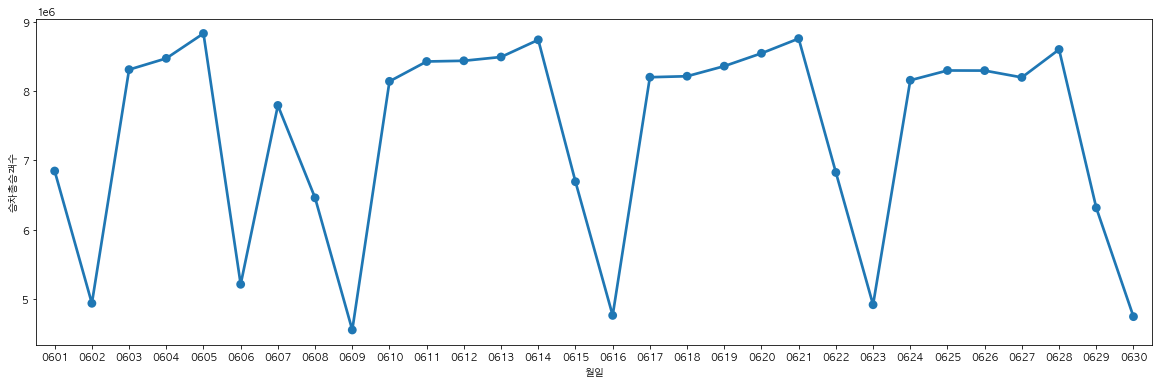

In [42]:
#일자별 승객수를 그래프로 살펴보기
#그래프를 그릴 수 있는 공간 준비
fig, ax = plt.subplots(figsize = (20,6))

#그래프 그리기
sns.pointplot(data = df_pivot, x='월일', y='승차총승객수')

### 월별 일자별그래프 그리기

In [43]:
#raw['연월']에 있는 값의 종류 살펴보기
raw['연월'].unique()

array(['201903', '201902', '201901', '201905', '201904', '201906'],
      dtype=object)

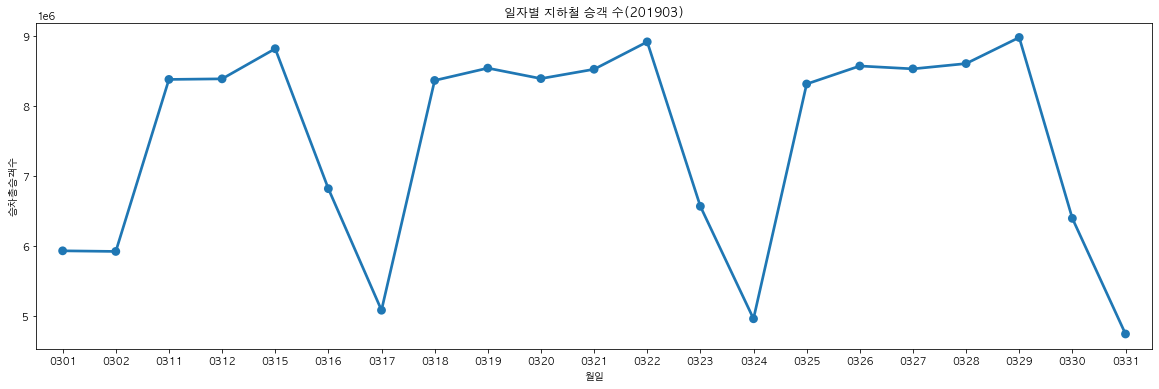

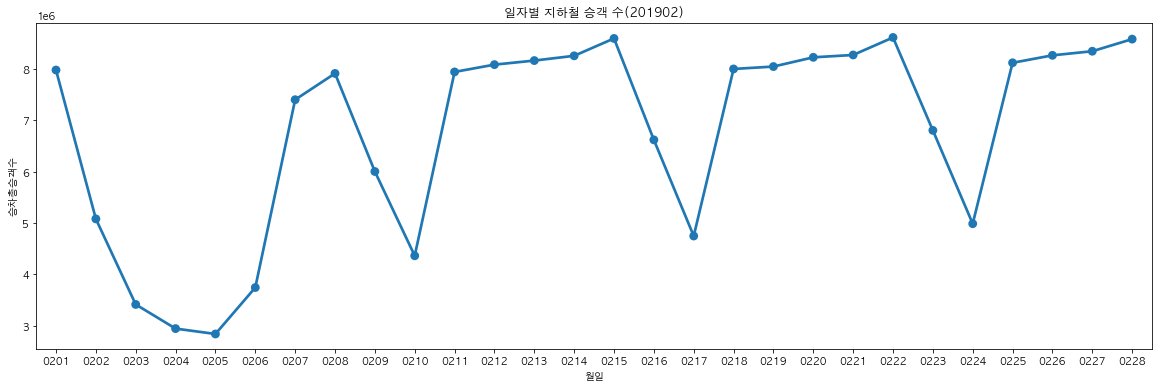

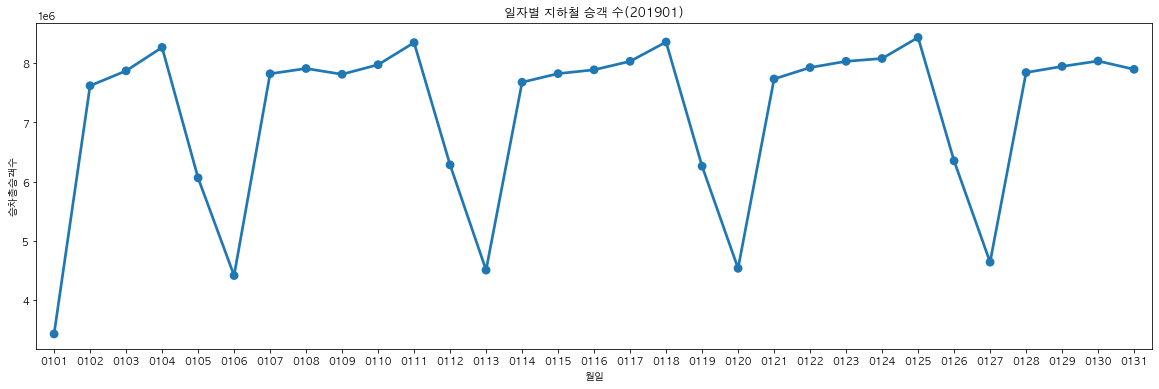

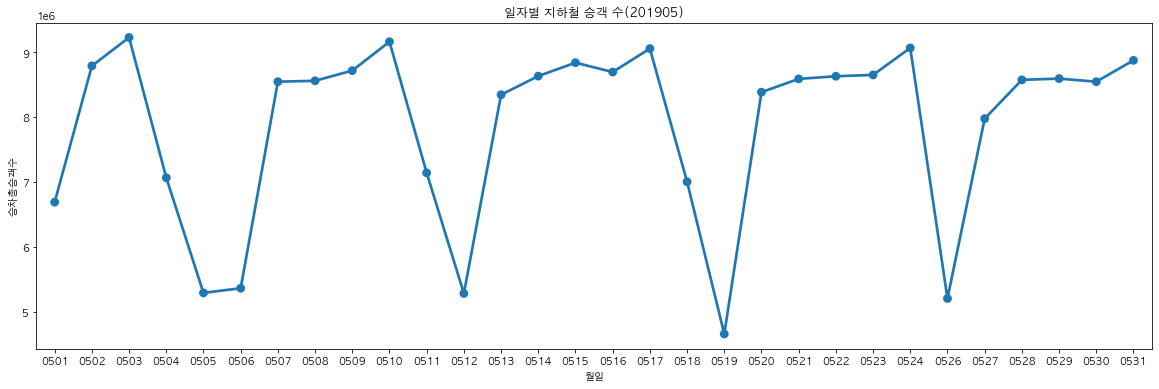

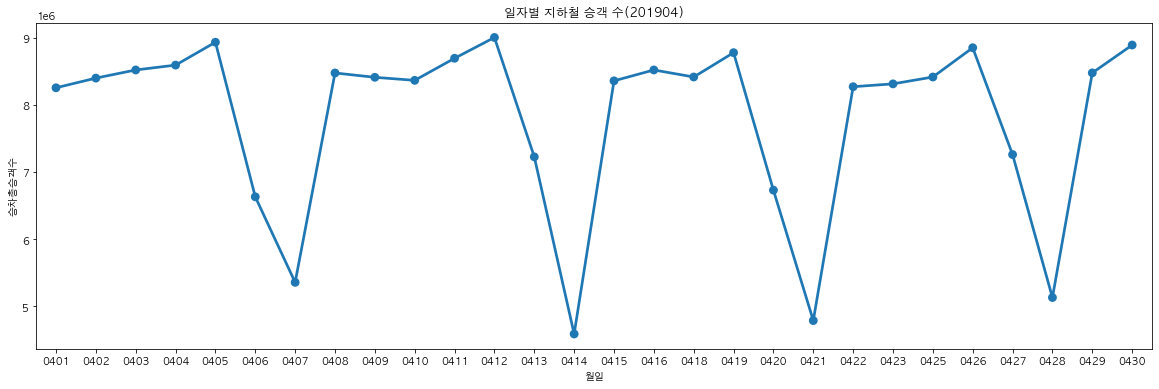

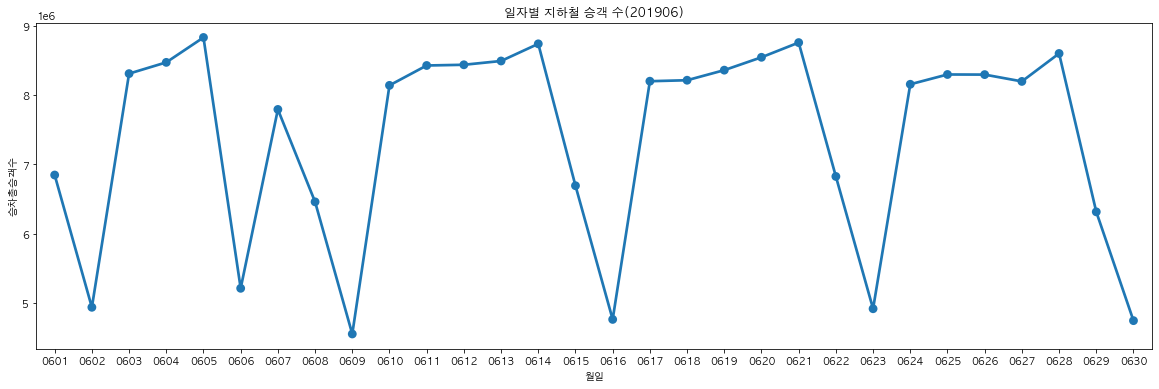

In [46]:
#반복문을 이용해, 모든 월에 대한 그래프 그려보기
#월별 그래프 그리기

for yearmonth in raw['연월'].unique():
#    print(yearmonth)
    
    cond = raw['연월'] == yearmonth
    df_selected = raw[cond]
    
    df_pivot = df_selected.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot.reset_index()

    fig, ax = plt.subplots(figsize = (20,6))
    #그래프 그리기
#    ax.set_title(f'일자별 지하철 승객 수({yearmonth})')
    ax.set_title('일자별 지하철 승객 수({})'.format(yearmonth))
    sns.pointplot(data = df_pivot, x='월일', y='승차총승객수')